#  Description

# # 1. Database Description

1.1. Introduction
This database is composed of 1951 multivariate time-series acquired by sensors on a SpectraQuest's Machinery Fault Simulator (MFS) Alignment-Balance-Vibration (ABVT). The 1951 comprises six different simulated states: normal function, imbalance fault, horizontal and vertical misalignment faults and, inner and outer bearing faults. This section describes the database.

The database is composed by several CSV (Comma-Separated Values) files, each one with 8 columns, one column for each sensor, according to:

column 1 -->
tachometer signal that allows to estimate rotation frequency;

columns 2 to 4 -->
underhang bearing accelerometer (axial, radiale tangential direction);

columns 5 to 7 -->
overhang bearing accelerometer (axial, radiale tangential direction);

column 8 -->
microphone.

[Link to the DateSet HomePage, Click Here.](http://www02.smt.ufrj.br/~offshore/mfs/page_01.html)

#  Loading DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob 
import statsmodels
import time

In [2]:
cur_path = "/kaggle/input/fault-induction-motor-dataset/"

#save all files path present in that folder into a file
normal_file_names = glob.glob(cur_path +'/normal/normal/*.csv')
imnormal_file_names_6g = glob.glob(cur_path+'/imbalance/imbalance/6g/*.csv')
imnormal_file_names_10g = glob.glob(cur_path+'/imbalance/imbalance/10g/*.csv')
imnormal_file_names_15g = glob.glob(cur_path+'/imbalance/imbalance/15g/*.csv')
imnormal_file_names_20g = glob.glob(cur_path+'/imbalance/imbalance/20g/*.csv')
imnormal_file_names_25g = glob.glob(cur_path+'/imbalance/imbalance/25g/*.csv')
imnormal_file_names_30g = glob.glob(cur_path+'/imbalance/imbalance/30g/*.csv')

In [3]:
normal_file_names[:2]

['/kaggle/input/fault-induction-motor-dataset//normal/normal/45.4656.csv',
 '/kaggle/input/fault-induction-motor-dataset//normal/normal/28.8768.csv']

In [4]:
imnormal_file_names_6g[:2]

['/kaggle/input/fault-induction-motor-dataset//imbalance/imbalance/6g/45.4656.csv',
 '/kaggle/input/fault-induction-motor-dataset//imbalance/imbalance/6g/53.6576.csv']

In [5]:
colnames = ['rpm','uh_a','uh_r','Uh_t','oh_a','oh_r','oh_t','sound']

#append all the files into one
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header= None,names=colnames)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [6]:
toc = time.time()

data_n = dataReader(normal_file_names)
data_6g = dataReader(imnormal_file_names_6g)
data_10g = dataReader(imnormal_file_names_10g)
data_15g = dataReader(imnormal_file_names_15g)
data_20g = dataReader(imnormal_file_names_20g)
data_25g = dataReader(imnormal_file_names_25g)
data_30g = dataReader(imnormal_file_names_30g)

tic = time.time()
print('execution time ',(tic - toc)*1000,'ms')

execution time  233243.4687614441 ms


In [7]:
data_n.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250000 entries, 0 to 12249999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   rpm     float64
 1   uh_a    float64
 2   uh_r    float64
 3   Uh_t    float64
 4   oh_a    float64
 5   oh_r    float64
 6   oh_t    float64
 7   sound   float64
dtypes: float64(8)
memory usage: 747.7 MB


In [8]:
data_n.head()

,rpm,uh_a,uh_r,Uh_t,oh_a,oh_r,oh_t,sound
0,-0.79198,-0.32398,-0.45381,0.233640,-0.40261,-0.020101,-0.104640,-0.099248
1,-0.95877,0.70368,-0.28989,0.258740,-0.36562,-0.018753,-0.004520,0.038236
2,-0.80153,-0.07864,-0.46325,-0.012234,-0.46396,-0.022398,-0.043919,0.125900
3,-0.82726,0.67367,0.10146,-0.136560,-0.38256,-0.021468,0.049500,-0.160140
4,-0.95506,-0.10650,-0.48576,-0.470790,-0.49939,-0.024554,-0.024306,0.315180


# Data Sampling

In [9]:
def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        data_decreased = data_decreased.append(data.iloc[a:b,:].sum()/x,ignore_index=True)
        a += x
        b += x
    return data_decreased

In [10]:
data_n = downSampler(data_n, 0, 5000)
data_6g = downSampler(data_6g, 0, 5000)
data_10g = downSampler(data_10g, 0, 5000)
data_15g = downSampler(data_15g, 0, 5000)
data_20g = downSampler(data_20g, 0, 5000)
data_25g = downSampler(data_25g, 0, 5000)
data_30g = downSampler(data_30g, 0, 5000)

In [11]:
data_n.describe()

,rpm,uh_a,uh_r,Uh_t,oh_a,oh_r,oh_t,sound
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,0.000157,0.007892,-0.000466,0.000373,0.014837,0.003021,0.018774,0.012278
std,0.087981,0.020933,0.007791,0.002300,0.431467,0.013938,0.294291,0.003197
min,-0.270002,-0.110925,-0.023872,-0.006576,-1.790029,-0.097399,-1.692283,-0.010445
25%,-0.052851,-0.003769,-0.005519,-0.000975,-0.176750,-0.001365,-0.147834,0.010694
50%,0.000740,0.006625,-0.000531,0.000343,0.020716,0.002898,0.023486,0.012157
75%,0.048093,0.017605,0.004784,0.001750,0.209201,0.007100,0.184953,0.013550
max,0.379215,0.138848,0.023753,0.007436,2.133327,0.121705,1.527537,0.040879


# Data Visualization

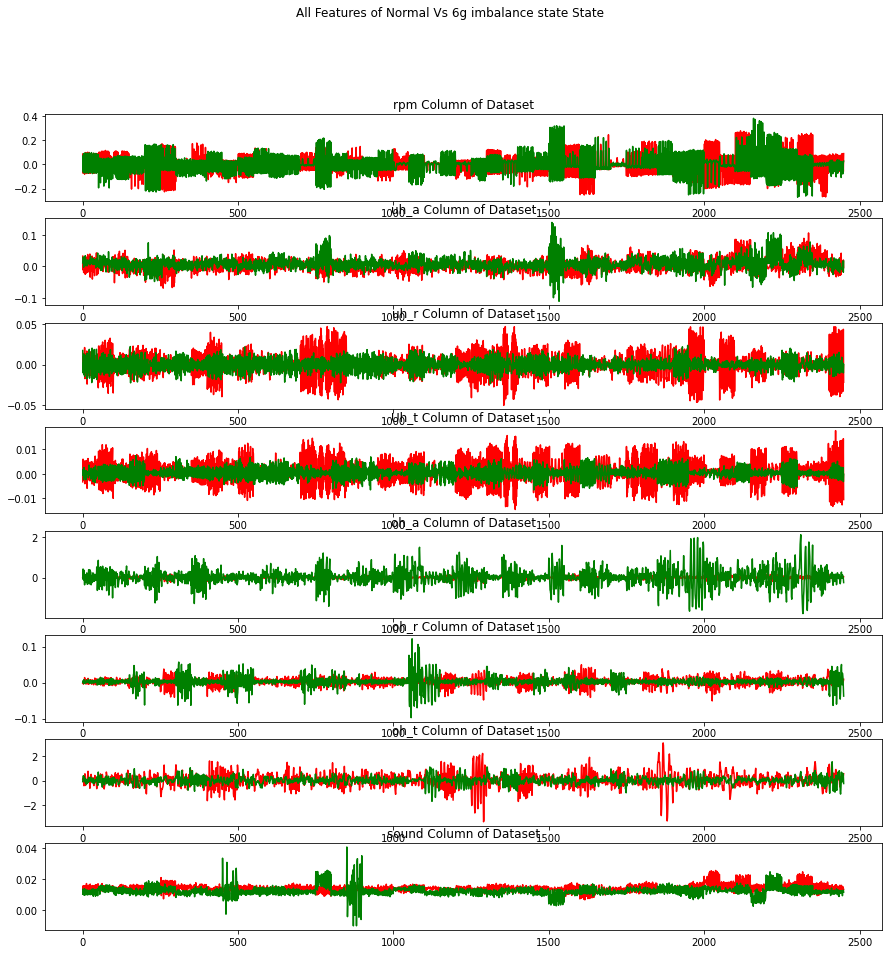

In [12]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Vs 6g imbalance state State')
j = 0
for i in data_n.columns:
    axs[j].plot(data_6g[i],'r')
    axs[j].plot(data_n[i],'g')
    axs[j].set_title('{} Column of Dataset'.format(i))
    
    #axs[j].set_title('{} Column of imbalance State'.format(i))
    j += 1

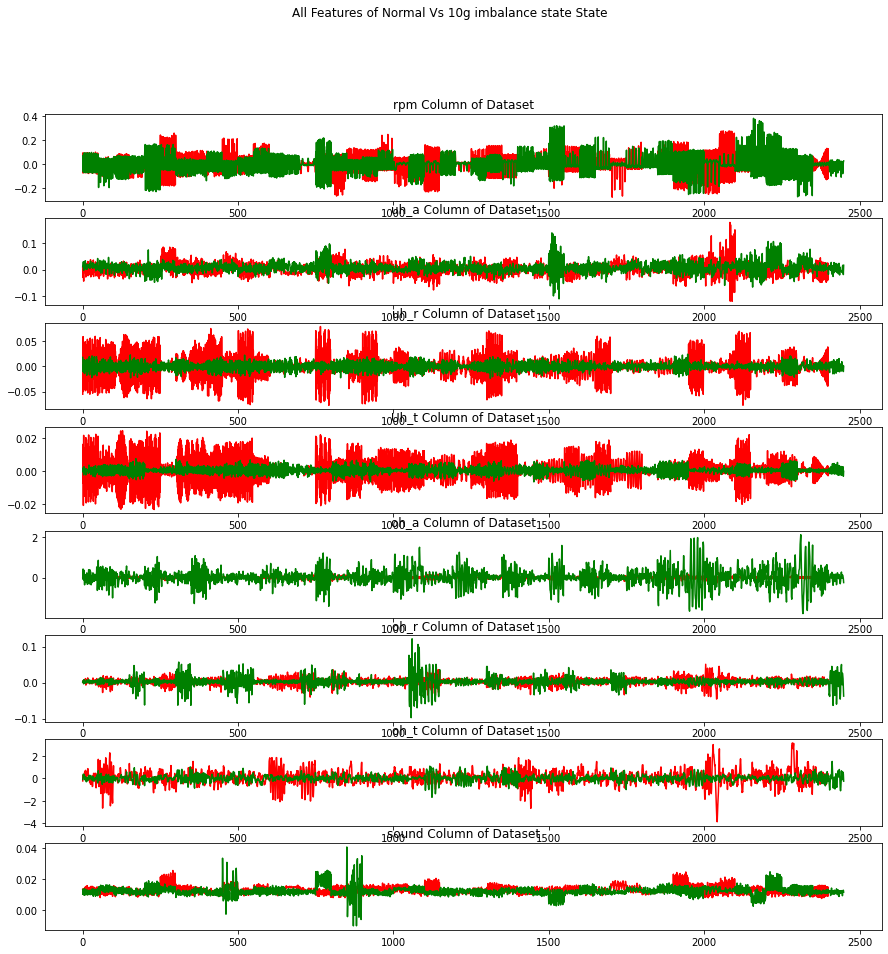

In [13]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Vs 10g imbalance state State')
j = 0
for i in data_n.columns:
    axs[j].plot(data_10g[i],'r')
    axs[j].plot(data_n[i],'g')
    axs[j].set_title('{} Column of Dataset'.format(i))
    
    #axs[j].set_title('{} Column of imbalance State'.format(i))
    j += 1

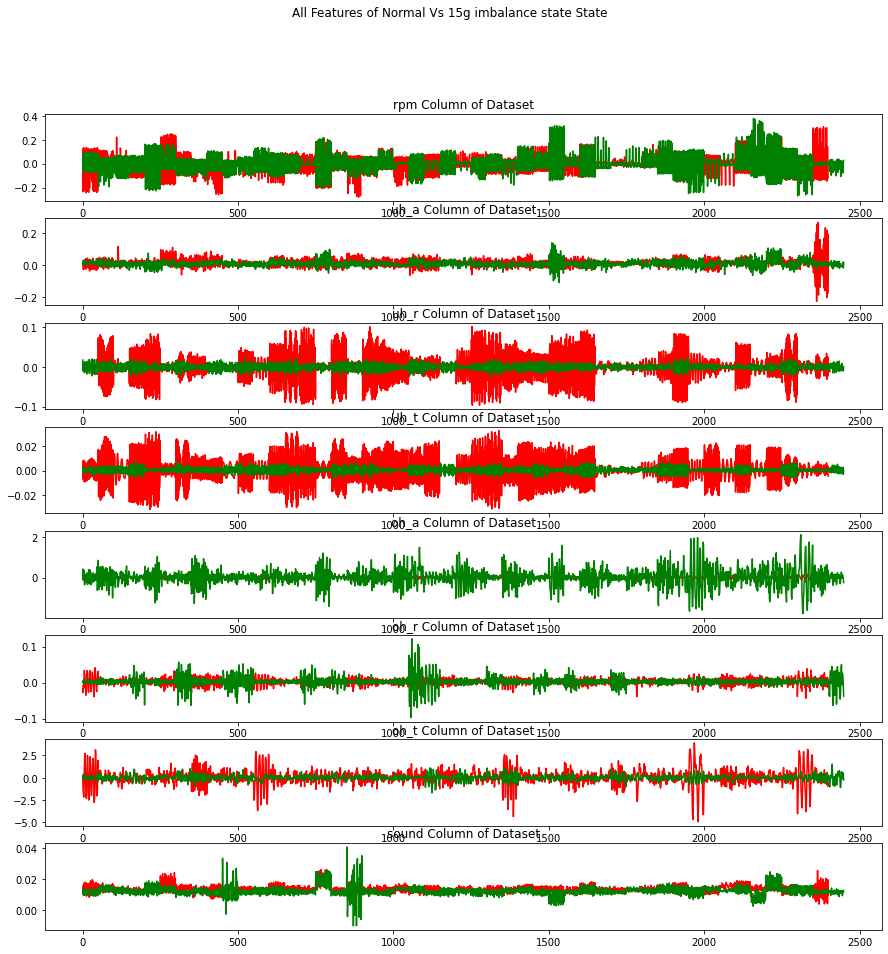

In [14]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Vs 15g imbalance state State')
j = 0
for i in data_n.columns:
    axs[j].plot(data_15g[i],'r')
    axs[j].plot(data_n[i],'g')
    axs[j].set_title('{} Column of Dataset'.format(i))
    
    #axs[j].set_title('{} Column of imbalance State'.format(i))
    j += 1

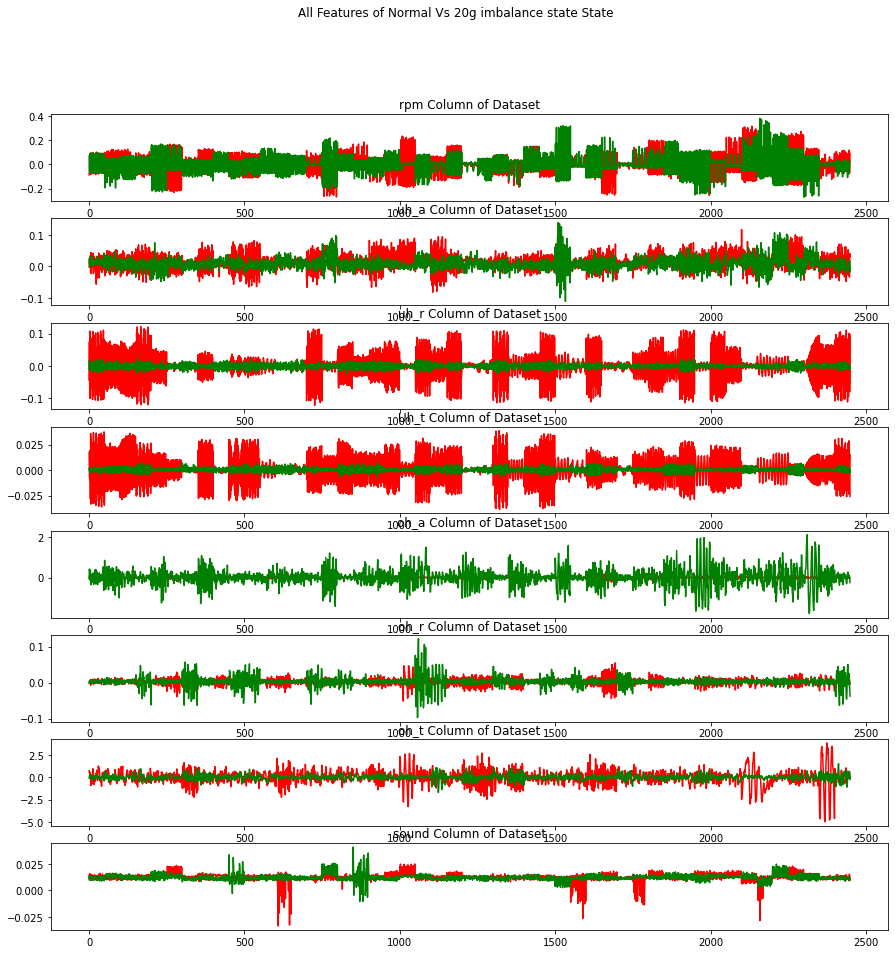

In [15]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Vs 20g imbalance state State')
j = 0
for i in data_n.columns:
    axs[j].plot(data_20g[i],'r')
    axs[j].plot(data_n[i],'g')
    axs[j].set_title('{} Column of Dataset'.format(i))
    
    #axs[j].set_title('{} Column of imbalance State'.format(i))
    j += 1

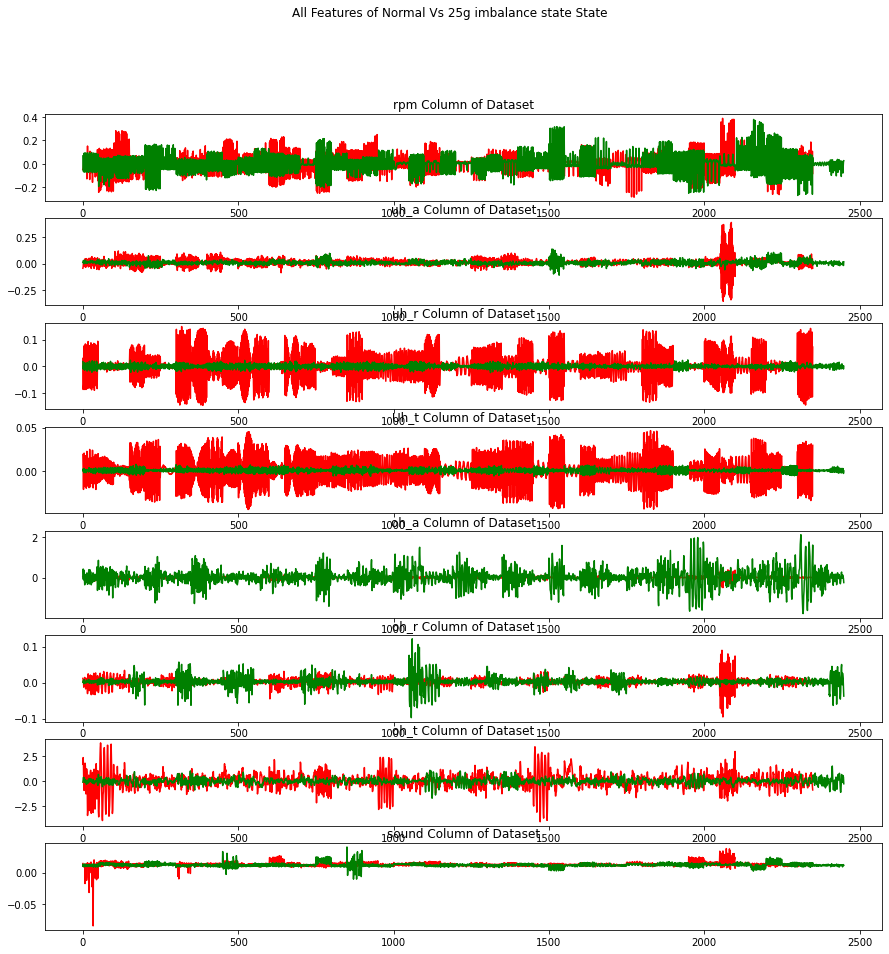

In [16]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Vs 25g imbalance state State')
j = 0
for i in data_n.columns:
    axs[j].plot(data_25g[i],'r')
    axs[j].plot(data_n[i],'g')
    axs[j].set_title('{} Column of Dataset'.format(i))
    
    #axs[j].set_title('{} Column of imbalance State'.format(i))
    j += 1

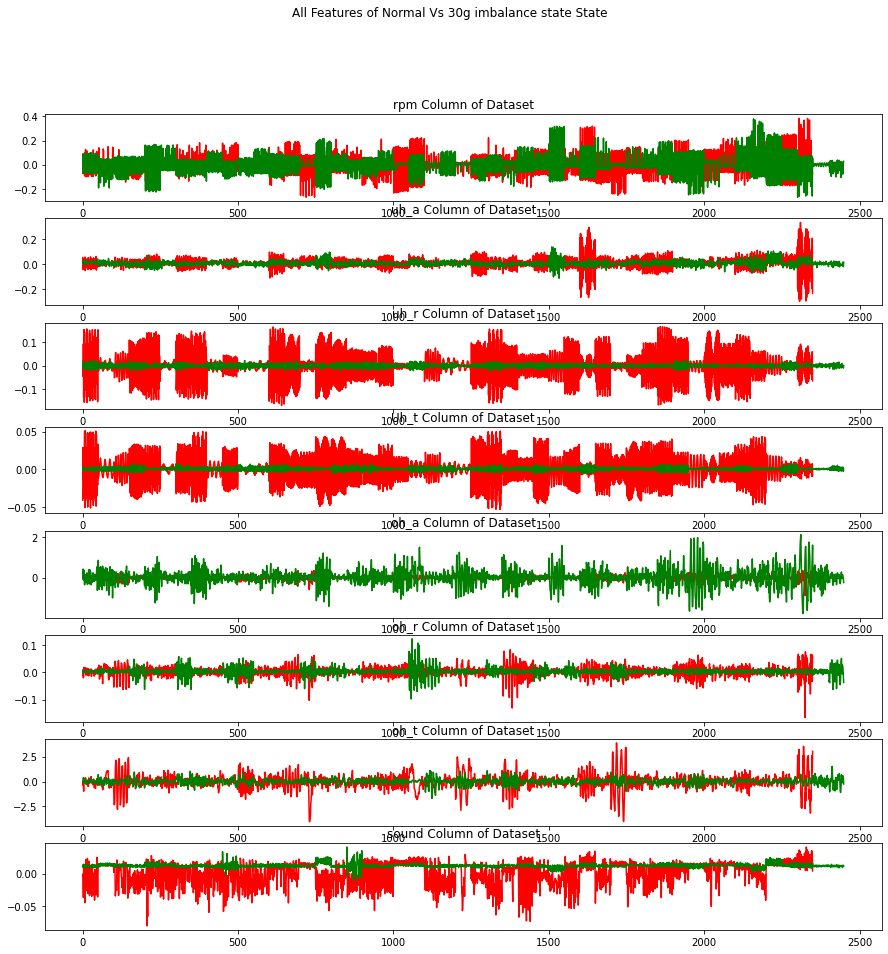

In [17]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,15))
fig.suptitle('All Features of Normal Vs 30g imbalance state State')
j = 0
for i in data_n.columns:
    axs[j].plot(data_30g[i],'r')
    axs[j].plot(data_n[i],'g')
    axs[j].set_title('{} Column of Dataset'.format(i))
    
    #axs[j].set_title('{} Column of imbalance State'.format(i))
    j += 1

# Data Preprocessing & Transformation from time domain to frequency domain

In [18]:
from scipy import signal
def FFT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

In [19]:
data_n = FFT(data_n)
data_6g = FFT(data_6g)
data_10g = FFT(data_10g)
data_15g = FFT(data_15g)
data_20g = FFT(data_20g)
data_25g = FFT(data_25g)
data_30g = FFT(data_30g)

# Data Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data_n  = pd.DataFrame(mms.fit_transform(data_n)) 
data_6g = pd.DataFrame(mms.fit_transform(data_6g)) 
data_10g= pd.DataFrame(mms.fit_transform(data_10g)) 
data_15g= pd.DataFrame(mms.fit_transform(data_15g)) 
data_20g= pd.DataFrame(mms.fit_transform(data_20g)) 
data_25g= pd.DataFrame(mms.fit_transform(data_25g)) 
data_30g= pd.DataFrame(mms.fit_transform(data_30g)) 

In [21]:
data_n.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000
mean,0.339210,0.491190,0.180796,0.456462,0.479946,0.372726,0.461762,0.443898,0.169200,0.190104,0.157171,0.096786,0.109823,0.451625,0.468206
std,0.017220,0.087038,0.027369,0.092748,0.118117,0.137775,0.112148,0.160044,0.021497,0.031640,0.026308,0.044160,0.025156,0.287476,0.266764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333418,0.454835,0.162811,0.405404,0.406700,0.276674,0.393147,0.317030,0.162154,0.174441,0.146053,0.062587,0.100223,0.177482,0.241336
50%,0.339079,0.490417,0.177138,0.468284,0.479536,0.353617,0.460947,0.425071,0.168720,0.187582,0.156307,0.089217,0.109003,0.443871,0.468346
75%,0.344877,0.528428,0.194238,0.512588,0.552578,0.451322,0.529411,0.553567,0.176075,0.205038,0.167763,0.127121,0.119146,0.727442,0.696395
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
data_n.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.339273,0.490003,0.151694,0.506939,0.477355,0.269987,0.452775,0.265858,0.168331,0.182050,0.155661,0.039627,0.107724,0.001232,0.000000
1,0.339206,0.487924,0.151198,0.500722,0.480324,0.273813,0.461044,0.270689,0.168144,0.180787,0.155210,0.039104,0.107322,0.005203,0.000428
2,0.339059,0.489412,0.151509,0.507375,0.481850,0.269370,0.461251,0.270817,0.168166,0.180721,0.155522,0.038508,0.107296,0.015101,0.000750
3,0.339110,0.491079,0.151201,0.504563,0.477262,0.269330,0.453308,0.278560,0.168367,0.182406,0.156124,0.039435,0.108209,0.022000,0.001108
4,0.339414,0.485626,0.151563,0.503438,0.477380,0.278785,0.457129,0.281145,0.168250,0.181450,0.155898,0.039802,0.108796,0.029164,0.001360


In [23]:
y_1 = pd.DataFrame(np.ones(int(len(data_n)),dtype=int))
y_2 = pd.DataFrame(np.zeros(int(len(data_6g)),dtype=int))
y_3 = pd.DataFrame(np.full((int(len(data_10g)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_15g)),1),3))
y_5 = pd.DataFrame(np.full((int(len(data_20g)),1),4))
y_6 = pd.DataFrame(np.full((int(len(data_25g)),1),5))
y_7 = pd.DataFrame(np.full((int(len(data_30g)),1),6))
y = pd.concat([y_1,y_2,y_3,y_4,y_5,y_6,y_7], ignore_index=True)
y.shape

(33693, 1)

In [24]:
data = pd.concat([data_n,data_6g,data_10g,data_15g,data_20g,data_25g,data_30g],ignore_index=True)
data.shape

(33693, 15)

# Data Splitting

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25,shuffle=True)

In [26]:
print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

Shape of Train Data : (25269, 15)
Shape of Test Data : (8424, 15)


# SVM Classifire

In [27]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
print("SVM accuracy is {} on Train Dataset".format(svm.score(X_train,y_train)))
print("SVM accuracy is {} on Test Dataset".format(svm.score(X_test,y_test)))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVM accuracy is 0.9946574854564881 on Train Dataset
SVM accuracy is 0.9943019943019943 on Test Dataset


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1203
           1       1.00      1.00      1.00      1217
           2       0.99      1.00      1.00      1236
           3       0.99      0.98      0.99      1166
           4       0.99      1.00      0.99      1248
           5       1.00      0.99      1.00      1178
           6       1.00      1.00      1.00      1176

    accuracy                           0.99      8424
   macro avg       0.99      0.99      0.99      8424
weighted avg       0.99      0.99      0.99      8424



# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance' )
knn.fit(X_train,y_train)
print("k={}NN Accuracy on Train Data: {}".format(3,knn.score(X_train,y_train)))
print("k={}NN Accuracy on Test Data: {}".format(3,knn.score(X_test,y_test)))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


k=3NN Accuracy on Train Data: 1.0
k=3NN Accuracy on Test Data: 0.997269705603039


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train,y_train)
print("Random Forest Accuracy on Train Data: {}".format(classifier_rf.score(X_train,y_train)))
print("Random Forest Accuracy on Test Data: {}".format(classifier_rf.score(X_test,y_test)))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Random Forest Accuracy on Train Data: 0.9772448454628201
Random Forest Accuracy on Test Data: 0.9737654320987654
